In [15]:
import pandas as pd
import numpy as np
import pyrsm as rsm

In [2]:
pilot_data = pd.read_csv('Total_Pilot_Data.csv')

In [3]:
pilot_data

,Treatment,Product,Day,Week,City,Clicks_per_day,Clicks_CUM,Saves_per_day,Saves_CUM,Shares,Messages_per_day,Messages_CUM
0,1,1,1,1,1,46,46,2,2,0,2.0,2
1,1,2,1,1,1,75,75,5,5,0,7.0,7
2,1,3,1,1,1,19,19,0,0,0,1.0,1
3,1,4,1,1,1,54,54,1,1,0,1.0,1
4,2,1,1,1,2,2,2,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,2,4,7,2,1,89,1135,1,36,0,1.0,16
108,1,1,7,2,2,3,34,0,3,0,1.0,2
109,1,2,7,2,2,54,553,3,27,0,4.0,26
110,1,3,7,2,2,96,794,3,27,2,5.0,43


# Compare Means

#### Compare Means (Clicks)

In [4]:
from scipy.stats import ttest_ind

# Separating the 'Day of the Week' data into two groups: Retail and Personal
retail_days = pilot_data[pilot_data['Treatment'] == 1]['Clicks_per_day']
personal_days = pilot_data[pilot_data['Treatment'] == 2]['Clicks_per_day']

# Performing the independent samples t-test
t_stat, p_value = ttest_ind(retail_days, personal_days)

t_stat, p_value


(1.7989081997683125, 0.07477529983656941)

We can statistically say there is no differene between using real and retail photos. However, the p value is almost on the threshold so further data would be required.

In [5]:
# create a new column named location so if week ==1 and type is personal or if week ==2 and type == retail, the cell will have San Diego, else Phoenix

pilot_data['Location'] = 'San Diego'
pilot_data.loc[(pilot_data['Week'] == 2) & (pilot_data['Treatment'] == 1), 'Location'] = 'Phoenix'
pilot_data.loc[(pilot_data['Week'] == 1) & (pilot_data['Treatment'] == 2), 'Location'] = 'Phoenix'


In [6]:
pilot_data.loc[80, 'Messages_per_day'] = 0
pilot_data.loc[84, 'Messages_per_day'] = 0

In [7]:
avg_clicks_loc_week = pilot_data.groupby(['Location','Week'])['Clicks_per_day'].mean()
avg_clicks_loc_week

Location   Week
Phoenix    1        43.928571
           2       143.357143
San Diego  1        28.428571
           2        49.964286
Name: Clicks_per_day, dtype: float64

In [8]:
# Average clicks for each location
avg_clicks_loc = pilot_data.groupby(['Location'])['Clicks_per_day'].mean()
avg_clicks_loc

Location
Phoenix      93.642857
San Diego    39.196429
Name: Clicks_per_day, dtype: float64

In [9]:
avg_clicks_product = pilot_data.groupby(['Product'])['Clicks_per_day'].mean()
avg_clicks_product

Product
1      9.392857
2     34.321429
3     39.357143
4    182.607143
Name: Clicks_per_day, dtype: float64

In [10]:
avg_clicks_product_week = pilot_data.groupby(['Product', 'Week'])['Clicks_per_day'].mean()
avg_clicks_product_week

Product  Week
1        1        15.071429
         2         3.714286
2        1        22.571429
         2        46.071429
3        1        11.000000
         2        67.714286
4        1        96.071429
         2       269.142857
Name: Clicks_per_day, dtype: float64

In [11]:
pilot_data['Messages_per_day'] = pilot_data['Messages_per_day'].astype('int32')

#### Compare Means (Messages)

In [12]:
from scipy.stats import ttest_ind

# Separating the 'Day of the Week' data into two groups: Retail and Personal
retail_days_messages = pilot_data[pilot_data['Treatment'] == 1]['Messages_per_day']
personal_days_messages = pilot_data[pilot_data['Treatment'] == 2]['Messages_per_day']

# Performing the independent samples t-test
t_stat, p_value = ttest_ind(retail_days_messages, personal_days_messages)

t_stat, p_value

(1.9882168442514094, 0.0492716434099909)

We can conclude that there exists a significant difference between using retail and real photos in order to receive more messages.

#### Compare Means (Saves)

In [13]:
from scipy.stats import ttest_ind

# Separating the 'Day of the Week' data into two groups: Retail and Personal
retail_days_saves = pilot_data[pilot_data['Treatment'] == 1]['Saves_per_day']
personal_days_saves = pilot_data[pilot_data['Treatment'] == 2]['Saves_per_day']

# Performing the independent samples t-test
t_stat, p_value = ttest_ind(retail_days_saves, personal_days_saves)

t_stat, p_value

(1.053271639712072, 0.2945246542991504)

Not Significant!

In [38]:
average_saves = pilot_data.groupby(['Location', 'Week'])['Saves_per_day'].mean()
average_saves

Location   Week
Phoenix    1       3.250000
           2       5.035714
San Diego  1       1.571429
           2       1.392857
Name: Saves_per_day, dtype: float64

# Linear Regression

#### Linear Regression (Clicks)

In [20]:
categorical_vars = ['Treatment', 'Product', 'Day', 'Week', 'City']

# Convert variables to categorical
for var in categorical_vars:
    pilot_data[var] = pilot_data[var].astype('category')

In [26]:
pilot_data.dtypes

Treatment           category
Product             category
Day                 category
Week                category
City                category
Clicks_per_day         int64
Clicks_CUM             int64
Saves_per_day          int64
Saves_CUM              int64
Shares                 int64
Messages_per_day       int32
Messages_CUM           int64
Location              object
dtype: object

In [21]:
clicks_reg = rsm.model.regress({"clicks regression": pilot_data}, rvar = "Clicks_per_day", evar = ["Treatment", "Product", "Day", "Week", "City"])
clicks_reg.summary()

Linear regression (OLS)
Data                 : clicks regression
Response variable    : Clicks_per_day
Explanatory variables: Treatment, Product, Day, Week, City
Null hyp.: the effect of x on Clicks_per_day is zero
Alt. hyp.: the effect of x on Clicks_per_day is not zero

              coefficient  std.error  t.value p.value     
Intercept           32.11     27.664    1.161   0.249     
Treatment[2]       -38.95     15.345   -2.538   0.013    *
Product[2]          24.93     21.701    1.149   0.253     
Product[3]          29.96     21.701    1.381    0.17     
Product[4]         173.21     21.701    7.982  < .001  ***
Day[2]             -42.75     28.708   -1.489    0.14     
Day[3]             -72.37     28.708   -2.521   0.013    *
Day[4]             -74.81     28.708   -2.606   0.011    *
Day[5]             -78.00     28.708   -2.717   0.008   **
Day[6]             -87.69     28.708   -3.054   0.003   **
Day[7]             -69.31     28.708   -2.414   0.018    *
Week[2]            

/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:36: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  and not pd.api.types.is_categorical_dtype(df[c].dtype)
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(s.dtype):
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(s.dtype):
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd

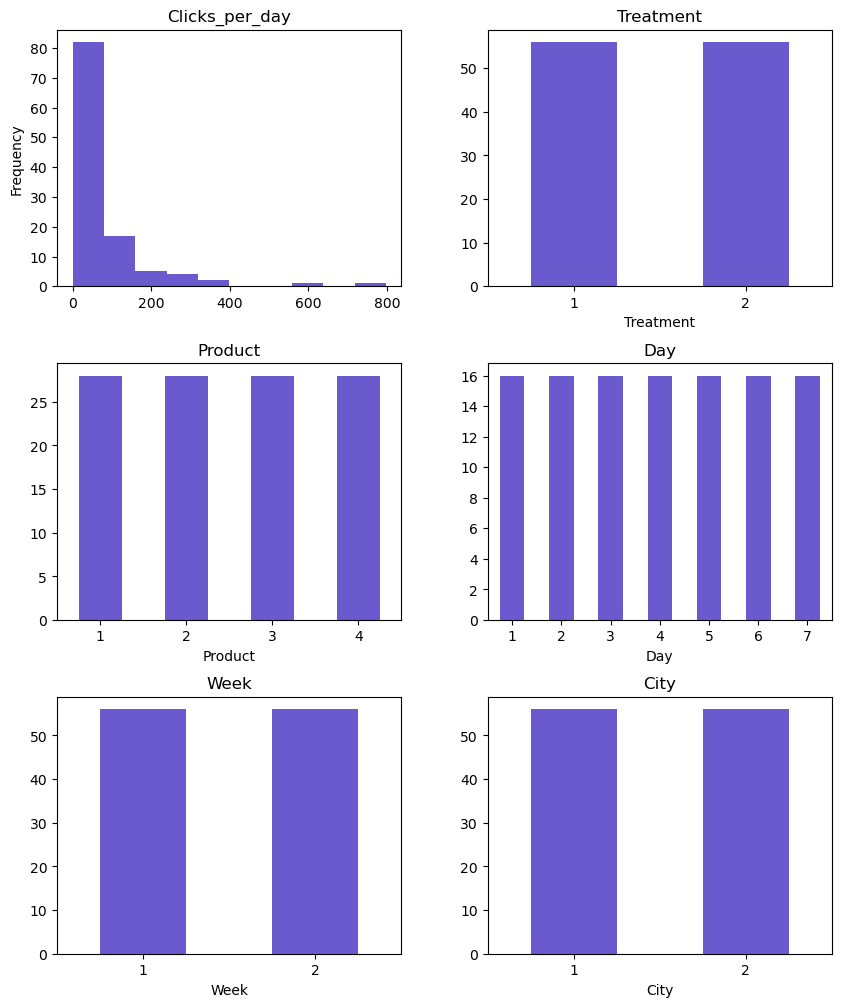

In [22]:
clicks_reg.plot('distr')

In [27]:
# Replace 0 in 'Clicks_per_day' with NaN temporarily for log calculation
pilot_data['Clicks_per_day_temp'] = pilot_data['Clicks_per_day'].replace(0, np.nan)

# Calculate the natural log of 'Clicks_per_day', log(0) will result in NaN
pilot_data['ln_Clicks_per_day'] = np.log(pilot_data['Clicks_per_day_temp'])

# Replace NaN back with 0 in 'ln_Clicks_per_day'
pilot_data['ln_Clicks_per_day'].fillna(0, inplace=True)

# Drop the temporary column
pilot_data.drop('Clicks_per_day_temp', axis=1, inplace=True)

In [28]:
clicks_reg = rsm.model.regress({"clicks regression": pilot_data}, rvar = "ln_Clicks_per_day", evar = ["Treatment", "Product", "Day", "Week", "City"])
clicks_reg.summary()

Linear regression (OLS)
Data                 : clicks regression
Response variable    : ln_Clicks_per_day
Explanatory variables: Treatment, Product, Day, Week, City
Null hyp.: the effect of x on ln_Clicks_per_day is zero
Alt. hyp.: the effect of x on ln_Clicks_per_day is not zero

              coefficient  std.error  t.value p.value     
Intercept            1.97      0.322    6.136  < .001  ***
Treatment[2]        -0.83      0.178   -4.661  < .001  ***
Product[2]           1.76      0.252    6.984  < .001  ***
Product[3]           1.60      0.252    6.358  < .001  ***
Product[4]           3.43      0.252   13.590  < .001  ***
Day[2]              -0.70      0.334   -2.107   0.038    *
Day[3]              -1.09      0.334   -3.267   0.001   **
Day[4]              -0.99      0.334   -2.959   0.004   **
Day[5]              -1.19      0.334   -3.565  < .001  ***
Day[6]              -1.31      0.334   -3.918  < .001  ***
Day[7]              -0.69      0.334   -2.079    0.04    *
Week[2]   

/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:36: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  and not pd.api.types.is_categorical_dtype(df[c].dtype)
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(s.dtype):
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(s.dtype):
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd

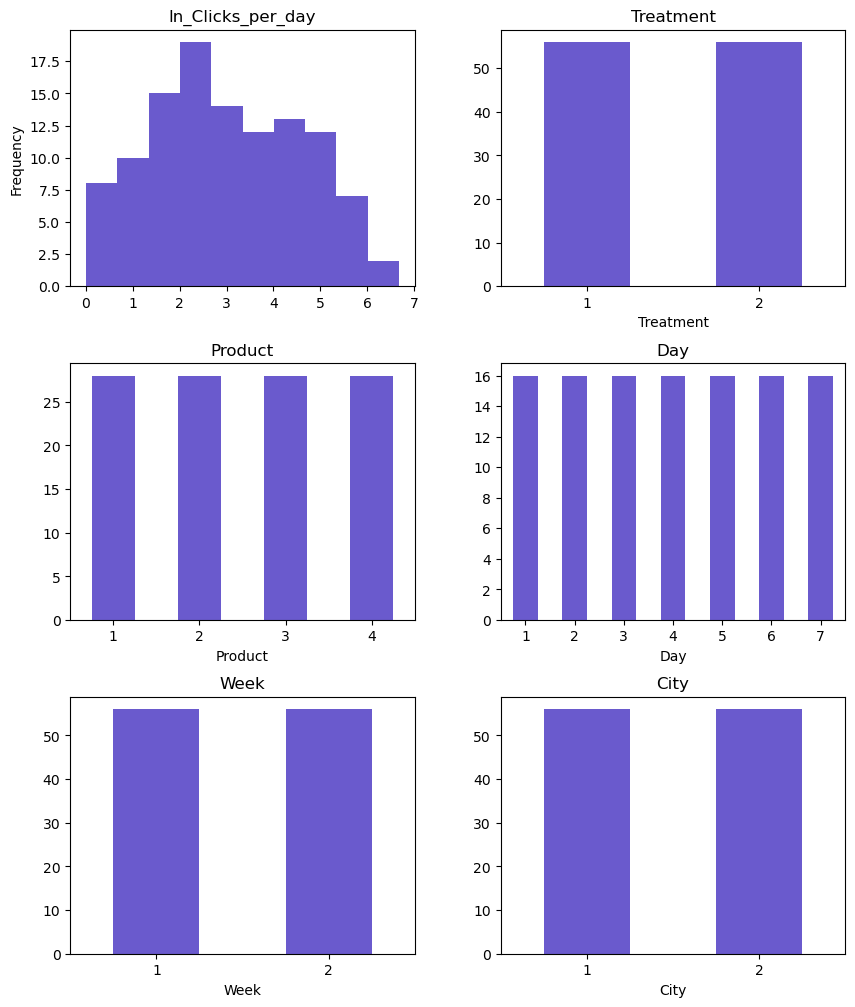

In [29]:
clicks_reg.plot('distr')

#### Linear Regression (Saves)

In [31]:
saves_reg = rsm.model.regress({"saves regression": pilot_data}, rvar = "Saves_per_day", evar = ["Treatment", "Product", "Day", "Week", "City"])
saves_reg.summary()

Linear regression (OLS)
Data                 : saves regression
Response variable    : Saves_per_day
Explanatory variables: Treatment, Product, Day, Week, City
Null hyp.: the effect of x on Saves_per_day is zero
Alt. hyp.: the effect of x on Saves_per_day is not zero

              coefficient  std.error  t.value p.value     
Intercept            2.29      1.301    1.757   0.082    .
Treatment[2]        -0.98      0.722   -1.361   0.177     
Product[2]           0.96      1.021    0.945   0.347     
Product[3]           0.68      1.021    0.665   0.508     
Product[4]           6.75      1.021    6.613  < .001  ***
Day[2]              -2.31      1.350   -1.713    0.09    .
Day[3]              -3.69      1.350   -2.731   0.007   **
Day[4]              -2.62      1.350   -1.944   0.055    .
Day[5]              -4.12      1.350   -3.055   0.003   **
Day[6]              -4.06      1.350   -3.008   0.003   **
Day[7]              -2.87      1.350   -2.129   0.036    *
Week[2]              0.

In [34]:
# Replace 0 in 'Clicks_per_day' with NaN temporarily for log calculation
pilot_data['Saves_per_day_temp'] = pilot_data['Saves_per_day'].replace(0, np.nan)

# Calculate the natural log of 'Clicks_per_day', log(0) will result in NaN
pilot_data['ln_Saves_per_day'] = np.log(pilot_data['Saves_per_day_temp'])

# Replace NaN back with 0 in 'ln_Clicks_per_day'
pilot_data['ln_Saves_per_day'].fillna(0, inplace=True)

# Drop the temporary column
pilot_data.drop('Saves_per_day_temp', axis=1, inplace=True)

In [35]:
saves_reg = rsm.model.regress({"saves regression": pilot_data}, rvar = "ln_Saves_per_day", evar = ["Treatment", "Product", "Day", "Week", "City"])
saves_reg.summary()

Linear regression (OLS)
Data                 : saves regression
Response variable    : ln_Saves_per_day
Explanatory variables: Treatment, Product, Day, Week, City
Null hyp.: the effect of x on ln_Saves_per_day is zero
Alt. hyp.: the effect of x on ln_Saves_per_day is not zero

              coefficient  std.error  t.value p.value     
Intercept            0.33      0.220    1.510   0.134     
Treatment[2]        -0.38      0.122   -3.072   0.003   **
Product[2]           0.35      0.173    2.036   0.044    *
Product[3]           0.13      0.173    0.773   0.442     
Product[4]           1.34      0.173    7.784  < .001  ***
Day[2]              -0.25      0.229   -1.102   0.273     
Day[3]              -0.48      0.229   -2.085    0.04    *
Day[4]              -0.20      0.229   -0.867   0.388     
Day[5]              -0.58      0.229   -2.551   0.012    *
Day[6]              -0.50      0.229   -2.176   0.032    *
Day[7]              -0.23      0.229   -1.020    0.31     
Week[2]       

/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:36: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  and not pd.api.types.is_categorical_dtype(df[c].dtype)
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(s.dtype):
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(s.dtype):
/opt/conda/lib/python3.11/site-packages/pyrsm/model/visualize.py:58: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd

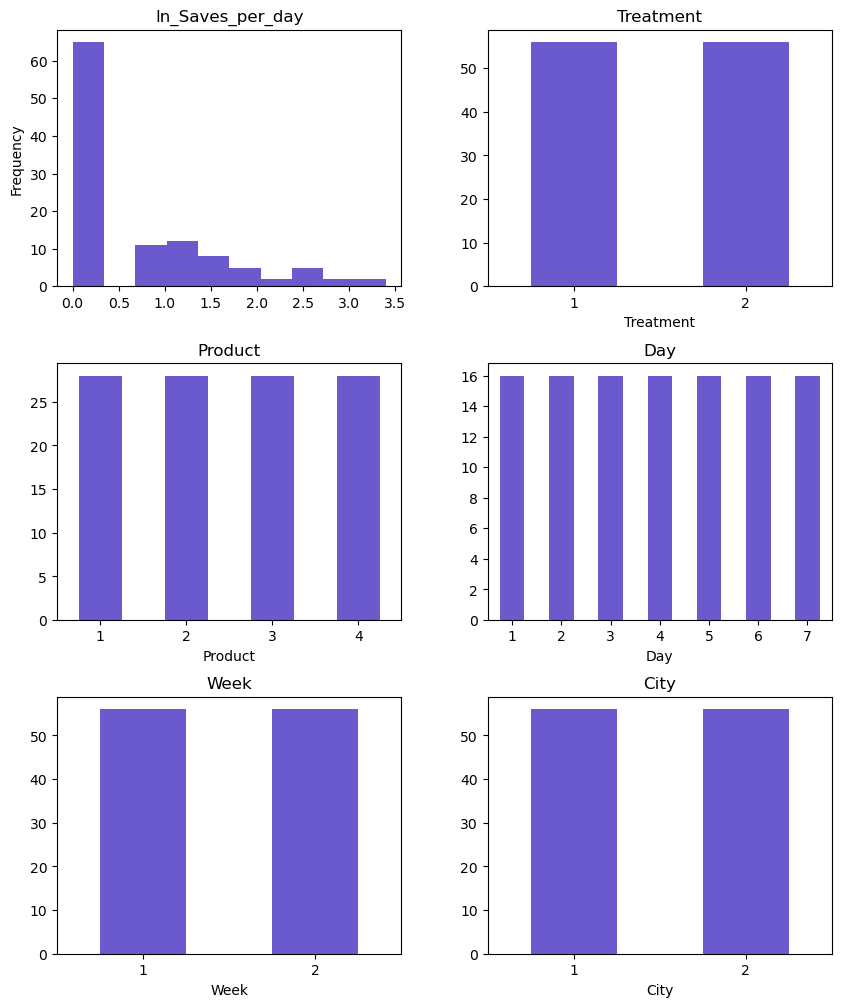

In [36]:
saves_reg.plot('distr')

#### Linear Regression (Saves)